In [313]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [314]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']
data

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
5,2010-10-08,Pistons,NaN,Jonas Jerebko,surgery to repair torn right Achilles tendon
6,2010-10-08,Pistons,NaN,Terrico White,surgery on right foot to repair broken fifth m...
7,2010-10-09,Nuggets,NaN,Al Harrington,partially torn plantar fascia in left foot (ou...
8,2010-10-12,Bucks,NaN,Darington Hobson,surgery on left hip (out for season)
9,2010-10-12,Kings,NaN,Samuel Dalembert,strained left groin (out indefinitely)


In [322]:
data[(data['Acquired']=='Derrick Rose') | (data['Relinquished']=='Derrick Rose')]

,Date,Team,Acquired,Relinquished,Notes
986,2012-01-11,Bulls,NaN,Derrick Rose,sprained left big toe (DNP)
1039,2012-01-16,Bulls,NaN,Derrick Rose,sprained left big toe / turf toe (DNP)
1276,2012-02-10,Bulls,NaN,Derrick Rose,strained lower back (DNP)
1296,2012-02-12,Bulls,NaN,Derrick Rose,strained lower back (DNP)
1305,2012-02-14,Bulls,NaN,Derrick Rose,strained lower back (DNP)
1332,2012-02-16,Bulls,NaN,Derrick Rose,strained lower back (DNP)
1344,2012-02-18,Bulls,NaN,Derrick Rose,strained lower back (DNP)
1557,2012-03-14,Bulls,NaN,Derrick Rose,sore groin (DNP)
1576,2012-03-16,Bulls,NaN,Derrick Rose,strained groin (DNP)
1589,2012-03-17,Bulls,NaN,Derrick Rose,strained groin (DNP)


In [315]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]
injury_data

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
5,2010-10-08,Pistons,NaN,Jonas Jerebko,surgery to repair torn right Achilles tendon
6,2010-10-08,Pistons,NaN,Terrico White,surgery on right foot to repair broken fifth m...
7,2010-10-09,Nuggets,NaN,Al Harrington,partially torn plantar fascia in left foot (ou...
8,2010-10-12,Bucks,NaN,Darington Hobson,surgery on left hip (out for season)
9,2010-10-12,Kings,NaN,Samuel Dalembert,strained left groin (out indefinitely)


In [316]:
# function definitions

def injType(x):
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [317]:
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [318]:
injury_data.head()

,Date,Team,Acquired,Relinquished,Notes,Injury Type
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,hand/finger
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely),achilles
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,foot
3,2010-10-08,Blazers,NaN,Jeff Pendergraph / Jeff Ayres,torn ACL in right knee (out indefinitely),knee
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),back


In [ ]:
# create a column for 'out indefinitely' or 'out for season'

In [319]:
injury_data.to_csv('injury_data.csv')

In [290]:
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
foot            585
illness         545
back            530
bruise          498
rest            422
hamstring       371
hand/finger     315
shoulder        299
groin           266
Misc.           241
calf            225
hip             195
head            188
wrist           138
arm             135
achilles        135
leg             112
core            101
face             92
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

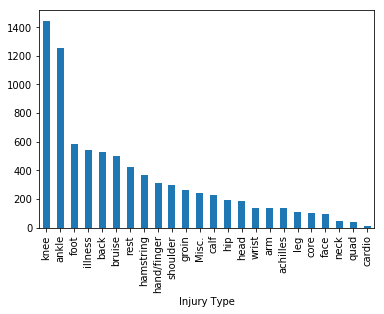

In [291]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [292]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries

,Date,Team,Acquired,Relinquished,Notes,Injury Type
44,2010-11-08,Magic,NaN,Mickael Pietrus,DNP,Misc.
71,2010-11-17,Jazz,NaN,Kyrylo Fesenko,dizziness (DNP),Misc.
84,2010-11-22,Hornets,NaN,Marcus Thornton (T.),DNP,Misc.
394,2011-02-03,Bucks,NaN,Chris Douglas-Roberts,DNP,Misc.
479,2011-02-25,Blazers,NaN,Gerald Wallace,DNP,Misc.
480,2011-02-25,Bobcats,NaN,D.J. White,DNP,Misc.
506,2011-03-01,Pistons,NaN,Tayshaun Prince,sore SI joint (DNP),Misc.
559,2011-03-13,Suns,NaN,Steve Nash,pubic symphysis (DNP),Misc.
564,2011-03-14,Suns,NaN,Steve Nash,pubic symphysis (DNP),Misc.
736,2011-04-10,Pistons,NaN,DaJuan Summers,ill (DNP),Misc.


In [297]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


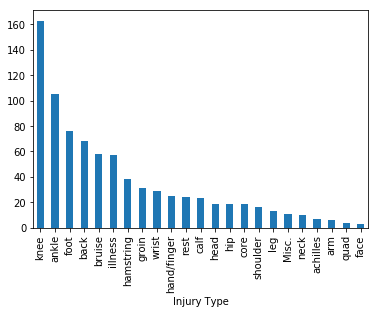

In [312]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


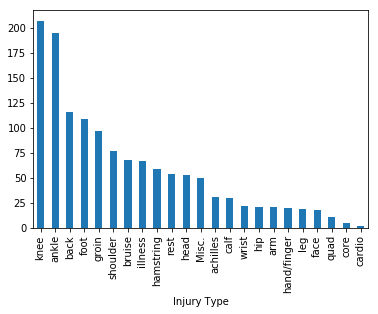

In [306]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


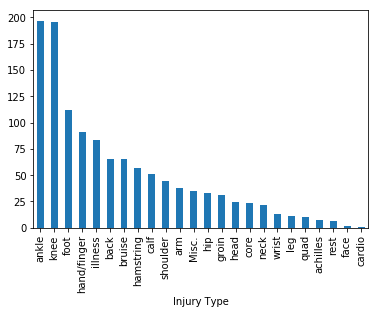

In [307]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


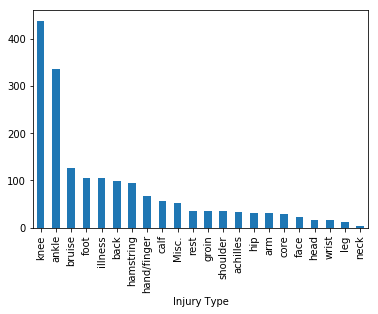

In [305]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


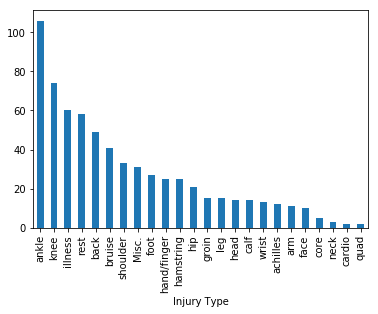

In [308]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

Total number of injuries:  809


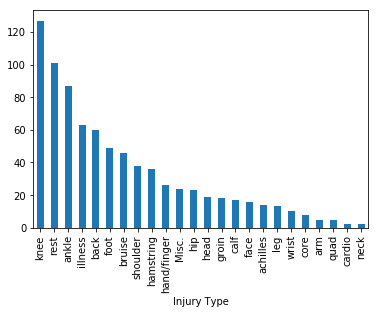

In [309]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


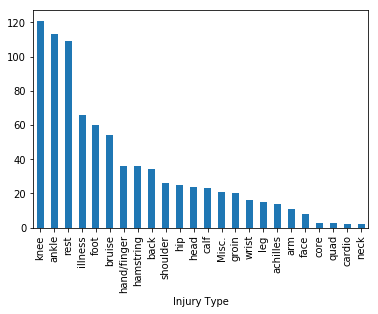

In [310]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


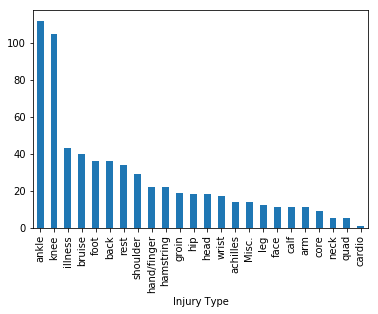

In [311]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [ ]:
# plot the number of injuries per season

